# BIGmama recruitment project 

- To kickstart any project in Machine learnig we have to follow some steps to achieve the best result and get a model more accurate with the minimum of errors

- The first step to start with is Data Preprocessiong:

- For machine learning algorithms to work, it is necessary to convert the raw data into a clean data set and dataset must be converted to numeric data. You have to encode all the categorical lables to column vectors with binary values. Missing values or NaNs in the dataset is an annoying problem. You have to either drop the missing rows or fill them up with a mean or interpolated values..

## Dataset
- The file has a base of trainand of test. They include the history of ads (ad_id, format) displayed on mobile applications (support_type, support_id) to a user (user_id, device_id, device_model, device_type, device_os, device_language). The advertising company obtains these places by an auction system (of the Vickrey auction type), called RTB. Here is a small explanation of the meaning of some variables:

 
 **bid_floor**: minimum bet
 
 **won_price**: price at which the auction is won
 
 **bid_price**: price to which we put, format 10 ^ 11 cost per thousand impressions. In addition to this, you need to know more about it.
 
 **cpc_price**: indicates the cost per click (10 ^ 8 format), ie at what price the click is sold to the advertiser. In addition to this, you need to know more about it.
 
**verticals_X**: are columns that refer to the "ranking" of the app, you can find information on the develop site of google (google search: verticals apps)
 
 **support_category**: is also a classification of support (site where ads are displayed). In addition to this, you need to know more about it.

 **viewability**: percentage of visibility (-1 if unknown)
 
 **position**: position of the ad on the page The objective is to find the probabilities for the column ***clicked***, omitted on purpose. The answer to the test is the code you wrote to find these probabilities.
 
 **Remarque:**
 - the columns **viewability**, **support_category**, and **cpc_price** don't exists in this Dataset

## DATA PREPROCESSING 

- First step we should do is loading necessary packages 

In [47]:
# Laoding Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tarfile 
import seaborn as sns
##### 
import os


- Because of the type of our Dataset in this task is tar.gz, We have to use the library of archieve file <a href="![image.png](attachment:image.png)">Visit tarfile</a>




In [48]:
tf = tarfile.open(r"C:\Users\dell\Downloads\data.tar.gz")

In [49]:
tf.extractall(r"C:\Users\dell\Desktop\projects\Gitlab\myfirstproject")

In [50]:
%cd C:\Users\dell\Desktop\projects\Gitlab\myfirstproject


C:\Users\dell\Desktop\projects\Gitlab\myfirstproject


In [51]:
df_train = pd.read_csv("train")
df_test = pd.read_csv("test")


C:\Users\dell\Anaconda3\envs\project_2020\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
df_train.head()

,timestamp,bidid,device_id,user_id,format,bidfloor,support_type,support_id,device_type,device_os,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
0,1430158023,VT56YgANZ5sK24hIAgB7+w==,a2304e2d-dd95-4431-a06e-9b976b83781f,CAESEJ5yQ9WDEoC_KMd3DzKeKl0,320x480,200000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544489,280000000,116000000,0
1,1430158024,VT56ZAAAeWMKNCwO6ABg+w==,fdef5b70-64c3-4afa-8e0e-8587bd4887e2,CAESEJ6WxEBHVaDXLlrXknLTCoA,320x480,1000000,app,353599677,1,ios,tr_TR,iphone,408,1462,1109,16,544489,280000000,195000000,0
2,1430158024,VT56ZAALt/oKG+GTGwB6sg==,db4cfc36-27f7-4e92-8201-d71d9b4d6cf7,CAESEPcNDSPNESnmoWp1Zck6j8A,320x480,199000000,app,911152486,1,ios,fr_FR,ipod,937,926,1462,1536,544489,280000000,241000000,0
3,1430158024,VT56ZAAMtH0KwmKp4AANng==,e113e09f-1899-4f97-94ac-00e243d8ef70,CAESELMvW0Vh_8Uwsio5w99n4qk,320x480,190000000,app,911793120,1,ios,fr_FR,iphone,937,1462,1536,1461,544489,280000000,137000000,0
4,1430158024,VT56ZAAOT5QKfN8IfAAieQ==,96653962-3033-476b-9dff-95d188f52d6d,CAESEKhcSWjJJHrkM-XAEDNaxgE,320x480,188000000,app,484115113,1,ios,fr_FR,iphone,61,13,299,0,544489,280000000,188000000,0


In [53]:
df_test.head()

,timestamp,bidid,device_id,user_id,format,bidfloor,support_type,support_id,device_type,device_os,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price
0,1430264861,VUAbtwAKfUwKG+JOugBfTw==,20189672-3ca0-48f8-957f-b2400005fea2,CAESEO1swnwzbyP_ulp5I6dwI9w,320x480,1000000,app,606697013,1,ios,en_EN,iphone,675,1462,0,0,544501,220000000,184000000
1,1430264862,VUAbuAANjzkKwo3v1AB++g==,8f46fac0-8893-4547-8ec7-028b4812057a,CAESEMgZsfgjSKT7GvZNAtFJaAs,320x480,1000000,app,905455244,1,ios,fr_FR,iphone,926,1462,1536,1071,544477,220000000,198000000
2,1430264862,VUAbuQAA39MKwuUk0wBMBQ==,692cb285-3ed0-4294-afda-fefb7a877238,CAESECYlSHMNcbKaLUtv2aXuBYw,320x480,197000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544501,220000000,197000000
3,1430264862,VUAbuQAB6HoKG+HGlQAW1w==,81f53cbd-0a22-4b94-87fb-8f3f4ef8148f,CAESEIM8HpwwPdYg_1FhZwa9sHo,320x480,198000000,app,911152486,1,ios,fr_FR,iphone,937,926,1462,1536,544501,220000000,208000000
4,1430264862,VUAbuQAJO6cKGxPLvQB1Sw==,cab4ae17-6b48-483e-ba68-ad49c8d944a0,CAESEK2HiR6F1ncLdKqp_F6vOF8,320x480,1000000,app,506916707,1,ios,en_EN,iphone,386,384,13,1379,544501,220000000,107000000


In [54]:
df_train.shape

(762239, 20)

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762239 entries, 0 to 762238
Data columns (total 20 columns):
timestamp          762239 non-null int64
bidid              762239 non-null object
device_id          762239 non-null object
user_id            762239 non-null object
format             762239 non-null object
bidfloor           762239 non-null int64
support_type       762239 non-null object
support_id         762239 non-null object
device_type        762239 non-null int64
device_os          762239 non-null object
device_language    762239 non-null object
device_model       762239 non-null object
verticals_0        762239 non-null int64
verticals_1        762239 non-null int64
verticals_2        762239 non-null int64
vertical_3         762239 non-null int64
ad_id              762239 non-null int64
bid_price          762239 non-null int64
won_price          762239 non-null int64
clicked            762239 non-null int64
dtypes: int64(11), object(9)
memory usage: 116.3+ MB


In [56]:
df_train.isnull().sum()

timestamp          0
bidid              0
device_id          0
user_id            0
format             0
bidfloor           0
support_type       0
support_id         0
device_type        0
device_os          0
device_language    0
device_model       0
verticals_0        0
verticals_1        0
verticals_2        0
vertical_3         0
ad_id              0
bid_price          0
won_price          0
clicked            0
dtype: int64

In [57]:
df_train.describe()

,timestamp,bidfloor,device_type,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
count,7.622390e+05,7.622390e+05,762239.0,762239.000000,762239.000000,762239.000000,762239.000000,762239.000000,7.622390e+05,7.622390e+05,762239.000000
mean,1.430229e+09,1.067488e+08,1.0,788.308649,1111.929544,713.135761,702.995267,544489.029298,2.500813e+08,1.443431e+08,0.049660
std,2.473193e+04,8.546395e+07,0.0,586.138335,543.867729,651.297752,637.507384,9.675878,4.189227e+07,6.221850e+07,0.217242
min,1.430158e+09,1.000000e+06,1.0,0.000000,0.000000,0.000000,0.000000,544477.000000,2.000000e+08,-1.000000e+05,0.000000
25%,1.430219e+09,1.000000e+06,1.0,294.000000,926.000000,105.000000,0.000000,544477.000000,2.200000e+08,1.020000e+08,0.000000
50%,1.430234e+09,1.310000e+08,1.0,926.000000,1462.000000,439.000000,937.000000,544489.000000,2.200000e+08,1.390000e+08,0.000000
75%,1.430247e+09,1.890000e+08,1.0,937.000000,1462.000000,1462.000000,1461.000000,544501.000000,2.800000e+08,1.880000e+08,0.000000
max,1.430265e+09,3.440000e+08,1.0,5693.000000,5711.000000,5527.000000,5182.000000,544501.000000,3.600000e+08,3.600000e+08,1.000000


In [58]:
categorical_features = df_train.select_dtypes(include ="object")
categorical_features.columns 

Index(['bidid', 'device_id', 'user_id', 'format', 'support_type', 'support_id',
       'device_os', 'device_language', 'device_model'],
      dtype='object')

In [59]:
numerical_feautes = df_train.select_dtypes(exclude="object")
categorical_features.columns 

Index(['bidid', 'device_id', 'user_id', 'format', 'support_type', 'support_id',
       'device_os', 'device_language', 'device_model'],
      dtype='object')

In [60]:
# Target variable 
df_train.clicked.value_counts()

0    724386
1     37853
Name: clicked, dtype: int64

In [61]:
df_train.head()

,timestamp,bidid,device_id,user_id,format,bidfloor,support_type,support_id,device_type,device_os,device_language,device_model,verticals_0,verticals_1,verticals_2,vertical_3,ad_id,bid_price,won_price,clicked
0,1430158023,VT56YgANZ5sK24hIAgB7+w==,a2304e2d-dd95-4431-a06e-9b976b83781f,CAESEJ5yQ9WDEoC_KMd3DzKeKl0,320x480,200000000,app,623367437,1,ios,fr_FR,iphone,1494,1462,105,937,544489,280000000,116000000,0
1,1430158024,VT56ZAAAeWMKNCwO6ABg+w==,fdef5b70-64c3-4afa-8e0e-8587bd4887e2,CAESEJ6WxEBHVaDXLlrXknLTCoA,320x480,1000000,app,353599677,1,ios,tr_TR,iphone,408,1462,1109,16,544489,280000000,195000000,0
2,1430158024,VT56ZAALt/oKG+GTGwB6sg==,db4cfc36-27f7-4e92-8201-d71d9b4d6cf7,CAESEPcNDSPNESnmoWp1Zck6j8A,320x480,199000000,app,911152486,1,ios,fr_FR,ipod,937,926,1462,1536,544489,280000000,241000000,0
3,1430158024,VT56ZAAMtH0KwmKp4AANng==,e113e09f-1899-4f97-94ac-00e243d8ef70,CAESELMvW0Vh_8Uwsio5w99n4qk,320x480,190000000,app,911793120,1,ios,fr_FR,iphone,937,1462,1536,1461,544489,280000000,137000000,0
4,1430158024,VT56ZAAOT5QKfN8IfAAieQ==,96653962-3033-476b-9dff-95d188f52d6d,CAESEKhcSWjJJHrkM-XAEDNaxgE,320x480,188000000,app,484115113,1,ios,fr_FR,iphone,61,13,299,0,544489,280000000,188000000,0


In [62]:
df_train.support_type.value_counts()

app        762130
website       109
Name: support_type, dtype: int64

In [63]:
df_train.device_os.value_counts()

ios    762239
Name: device_os, dtype: int64

In [64]:
df_train.device_language.value_counts()

fr_FR    729281
en_EN     16055
tr_TR      6714
zh_CN      1409
it_IT      1242
nl_NL      1000
pt_PT       936
es_ES       910
de_DE       897
ru_RU       810
ar_AR       679
ro_RO       412
ja_JA       247
pl_PL       208
ko_KO       192
sv_SV       176
th_TH       155
no_NO        96
zh_TW        94
da_DA        93
vi_VI        85
iw_IW        85
co_CO        58
el_EL        52
hr_HR        52
uk_UK        49
hy_HY        40
bn_BN        39
eu_EU        26
ta_TA        24
sq_SQ        17
hu_HU        17
ca_CA        13
bs_BS        11
cs_CS         9
fa_FA         8
km_KM         8
fi_FI         7
lo_LO         7
sk_SK         5
ka_KA         5
br_BR         4
mn_MN         2
ne_NE         2
yi_YI         1
id_ID         1
mg_MG         1
ln_LN         1
la_LA         1
ht_HT         1
ur_UR         1
pa_PA         1
Name: device_language, dtype: int64

# Univariate Exploration 

- In this part we are going to extract information from each feature and attempt to determine its importance in predicting if it omitted or not 
- as the clicked column is the target data or the output data that we have to build our model on, let's begin by this important column 

**clicked**

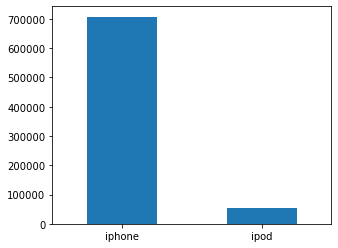

In [65]:
plt.figure(figsize = (5,4))
df_train.device_model.value_counts().plot(kind= "bar",rot = 0)

0    724386
1     37853
Name: clicked, dtype: int64

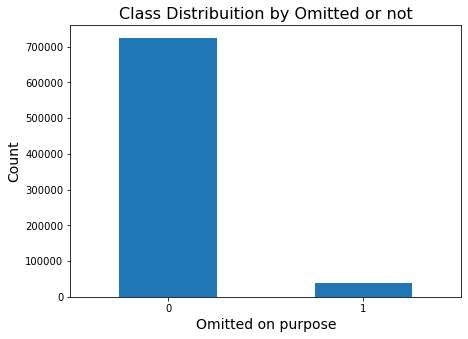

In [66]:
# Target variable clicked
plt.figure(figsize = (7,5))
df_train.clicked.value_counts().plot(kind = "bar", rot = 0);
plt.title('Class Distribuition by Omitted or not',fontsize=16);
plt.xlabel('Omitted on purpose',fontsize=14)
plt.ylabel('Count', fontsize=14)
df_train.clicked.value_counts()

- From the illustrations provided above it clear that the target column is a binary classification **(0,1)**, **omitted on purpose** or **not** 


app        762130
website       109
Name: support_type, dtype: int64

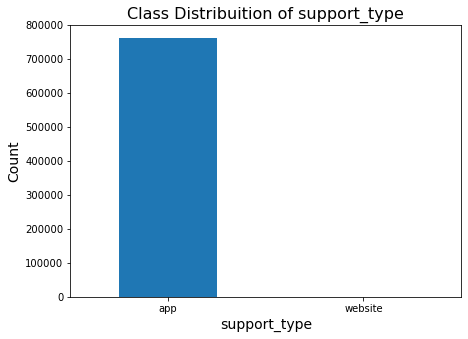

In [67]:
# support_type 
plt.figure(figsize = (7,5))
df_train.support_type.value_counts().plot(kind = "bar", rot = 0);
plt.title('Class Distribuition of support_type',fontsize=16);
plt.xlabel('support_type',fontsize=14)
plt.ylabel('Count', fontsize=14)
df_train.support_type.value_counts()

**device_os, device_type, format**

In [68]:
print(df_train.device_os.value_counts())
print("---------------------------------------")
print(df_train.device_type.value_counts())
print("---------------------------------------")
print(df_train.format.value_counts())


ios    762239
Name: device_os, dtype: int64
---------------------------------------
1    762239
Name: device_type, dtype: int64
---------------------------------------
320x480    762239
Name: format, dtype: int64


**Note:**
In the above cell we can see that the column **device_os**, **device_type**, **format** have the same value within all the rows
which means they have no effects in predicting our model, which means we can drop them later 


**device_midel**
 

iphone    707555
ipod       54684
Name: device_model, dtype: int64

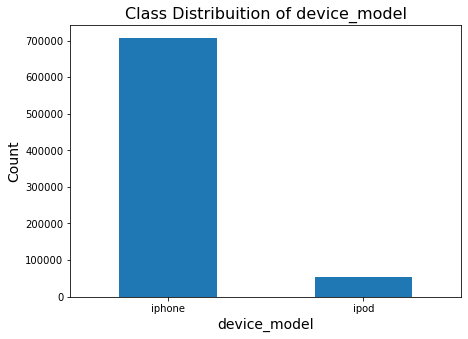

In [69]:
plt.figure(figsize = (7,5))
df_train.device_model.value_counts().plot(kind = "bar", rot = 0);
plt.title('Class Distribuition of device_model',fontsize=16);
plt.xlabel('device_model',fontsize=14)
plt.ylabel('Count', fontsize=14)
df_train.device_model.value_counts()

## Some Other Visualizations 

  **bid_price**

220000000    284734
280000000    262587
200000000     87243
320000000     66127
210000000     42071
360000000     19477
Name: bid_price, dtype: int64

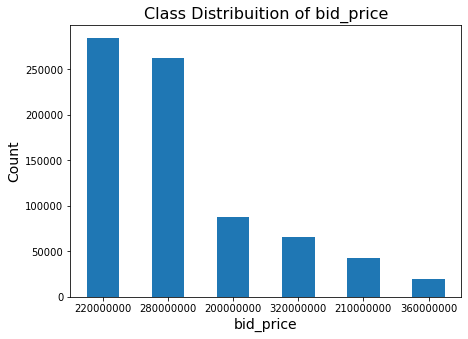

In [70]:
plt.figure(figsize = (7,5))
df_train.bid_price.value_counts().plot(kind = "bar", rot = 0);
plt.title('Class Distribuition of bid_price',fontsize=16);
plt.xlabel('bid_price',fontsize=14)
plt.ylabel('Count', fontsize=14)
df_train.bid_price.value_counts()

**ad_id**

220000000    284734
280000000    262587
200000000     87243
320000000     66127
210000000     42071
360000000     19477
Name: bid_price, dtype: int64

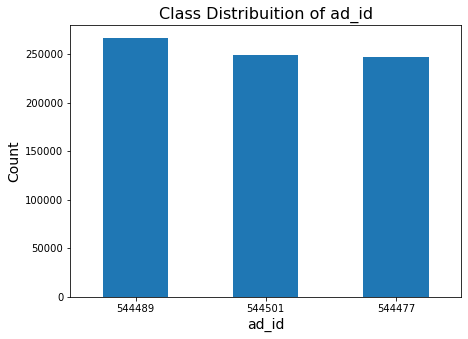

In [71]:
plt.figure(figsize = (7,5))
df_train.ad_id.value_counts().plot(kind = "bar", rot = 0);
plt.title('Class Distribuition of ad_id',fontsize=16);
plt.xlabel('ad_id',fontsize=14)
plt.ylabel('Count', fontsize=14)
df_train.bid_price.value_counts()

**won_price**

Text(0.5, 1.0, 'won_price distrubtion')

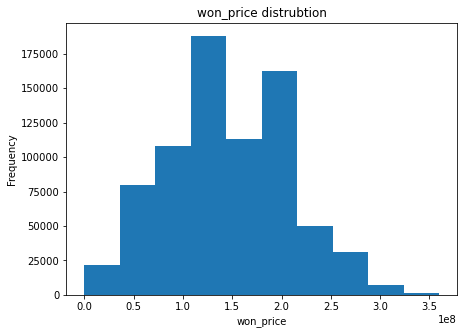

In [72]:
# won_price
plt.figure(figsize = (7,5))
df_train.won_price.plot(kind = "hist")
plt.xlabel("won_price")
plt.title("won_price distrubtion")

- The **skewness** is a parameter to measure the symmetry of a data set and the **kurtosis** to measure how heavy its tails are compared to a normal distribution, see for example.


In [73]:
# Calculate the skewness and the kurtosis of the feature won_price
print("The skeweness is :", df_train.won_price.skew())
print("The kurtosis is :", df_train.won_price.kurt())

The skeweness is : 0.20781329479141752
The kurtosis is : -0.383492237503126


### Bivariate and Multivariate Exploration 
- First of all I prefer to begin by vertical columns and making comparison between them 
- let's plot their histograms and interpret the results
  
**Verticals**

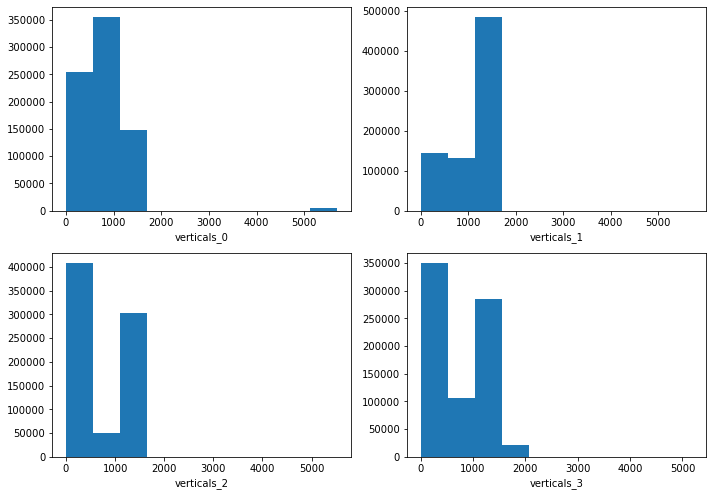

In [74]:
plt.figure(figsize= (10,7))
plt.subplot(2,2,1)
plt.hist(df_train.verticals_0)
plt.xlabel("verticals_0")

plt.subplot(2,2,2)
plt.hist(df_train.verticals_1)
plt.xlabel("verticals_1")

plt.subplot(2,2,3)
plt.hist(df_train.verticals_2)
plt.xlabel("verticals_2")

plt.subplot(2,2,4)
plt.hist(df_train.vertical_3)
plt.xlabel("verticals_3")

plt.tight_layout()


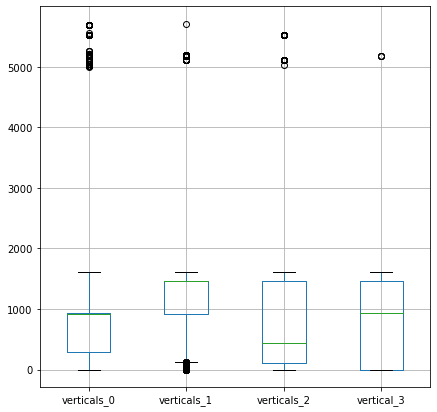

In [75]:
plt.figure(figsize = (7,7))
boxplot = df_train.boxplot(column=['verticals_0', 'verticals_1', 'verticals_2','vertical_3'])

**device_model & clicked** 

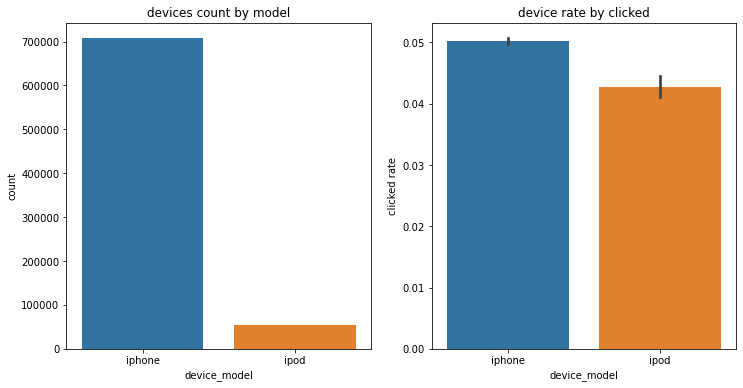

In [76]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(df_train['device_model'], ax=axarr[0]).set_title('devices count by model')
axarr[1].set_title('device rate by clicked')
b = sns.barplot(x='device_model', y='clicked', data=df_train, ax=axarr[1]).set_ylabel('clicked rate')

**bid_price & clicked**

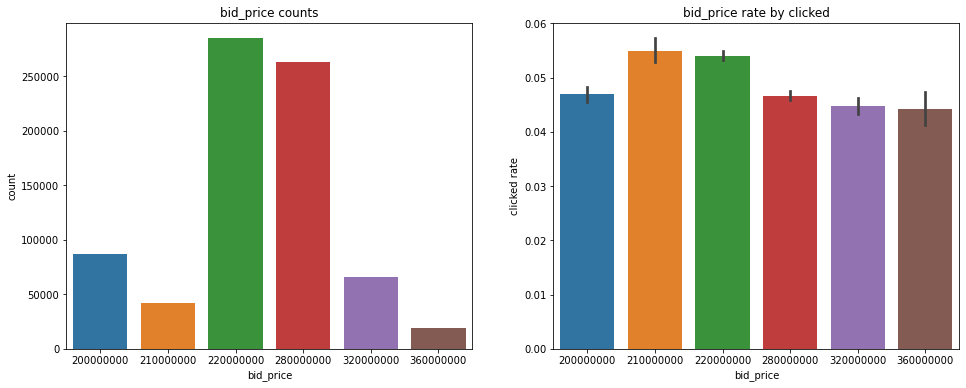

In [77]:
fig, axarr = plt.subplots(1, 2, figsize=(16,6))
a = sns.countplot(df_train['bid_price'], ax=axarr[0]).set_title('bid_price counts')
axarr[1].set_title('bid_price rate by clicked')
b = sns.barplot(x='bid_price', y='clicked', data=df_train, ax=axarr[1]).set_ylabel('clicked rate')

**won_price & clicked**

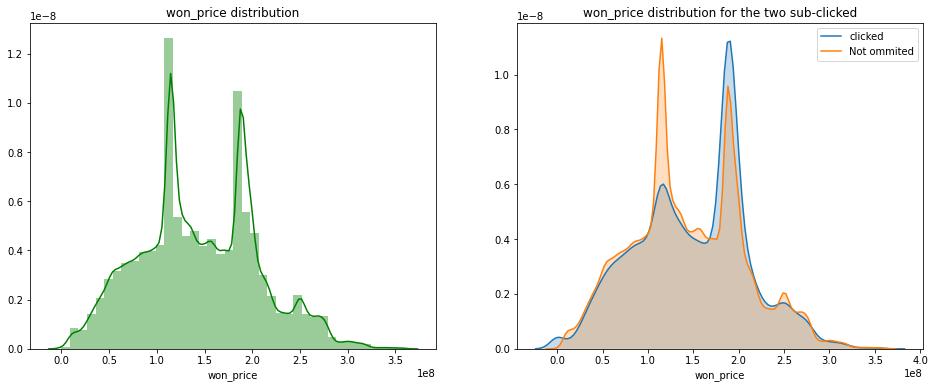

In [78]:
fig, axarr = plt.subplots(1,2,figsize=(16,6))
axarr[0].set_title('won_price distribution')
f = sns.distplot(df_train['won_price'], color='g', bins=40, ax=axarr[0])
axarr[1].set_title('won_price distribution for the two sub-clicked')
g = sns.kdeplot(df_train['won_price'].loc[df_train['clicked'] == 1], 
                shade= True, ax=axarr[1], label='clicked').set_xlabel('won_price')
g = sns.kdeplot(df_train['won_price'].loc[df_train['clicked'] == 0], 
                shade=True, ax=axarr[1], label='Not ommited')

### Data Manipulation 

Because of the data doesn't contain missing values which means we don't have missing values heandling. As a first step I'm going to use one of the technics to convert categorical features to numerical features to prepare them for the modeling part  

- Let's drop some useless features 


In [79]:
all_dat=[df_train,df_test]
for dataset in all_dat:
    drop_column = ['device_os','device_type','format','bidid','device_id','user_id','device_language','timestamp',"support_id","ad_id"]
    dataset.drop(drop_column, axis=1, inplace = True)

In [80]:
#df_train.head()
df_train.head()

,bidfloor,support_type,device_model,verticals_0,verticals_1,verticals_2,vertical_3,bid_price,won_price,clicked
0,200000000,app,iphone,1494,1462,105,937,280000000,116000000,0
1,1000000,app,iphone,408,1462,1109,16,280000000,195000000,0
2,199000000,app,ipod,937,926,1462,1536,280000000,241000000,0
3,190000000,app,iphone,937,1462,1536,1461,280000000,137000000,0
4,188000000,app,iphone,61,13,299,0,280000000,188000000,0


In [81]:
# The number of columns was reduced to 12 
print("The number of most important features we need to create the model is: ", df_train.shape[1])

The number of most important features we need to create the model is:  10


### Encoding 

In [82]:
df_train = pd.get_dummies(df_train, columns = ["support_type","device_model"])

df_test = pd.get_dummies(df_test, columns = ["support_type","device_model"])

### Total Correlations Between the Features 

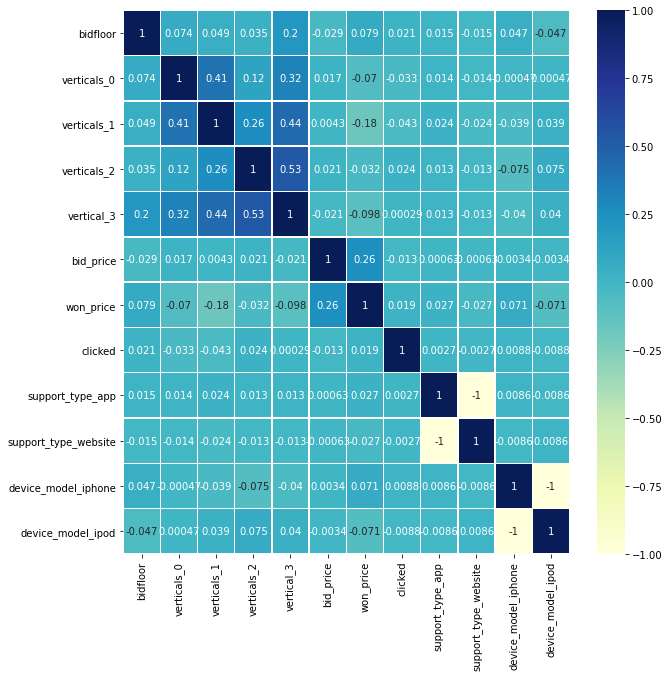

In [83]:
plt.figure(figsize = (10,10))
corr_ = df_train.corr()
sns.heatmap(corr_, annot = True,linewidths=.5,cmap="YlGnBu");

- Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between **verticals_2** and **vertical_3** i.e **0.53**. So we can carry on with all features.

## Modeling

 - Now we are ready to train a model and predict the required solution. There are lot of predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (clicked) with other variables or features (verticals, won_price, device_model...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:
 

Logistic Regression
 
 KNN
 
 Support Vector Machines

 Naive Bayes classifier

 Decision Tree
 
 Random Forrest

Linear Discriminant Analysis
 
 Ada Boost Classifier
 
 Gradient Boosting Classifier
 
 And also compared above given classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure and plot accuracy based confusion matrix
 
 #**Note**
 - In the next part you'll see that I chose for the evaluation matrics cross validation because I see that the best one for our model and calculate the accuracy score after, we can use instead some other evaluation matrics like ROC anf AUC, RMSE...etc 

- Also to implement all this algorithms is going to be slow and harful to the CPU and GPU, so it would be better to use only one algorithm (linear regression)

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762239 entries, 0 to 762238
Data columns (total 12 columns):
bidfloor                762239 non-null int64
verticals_0             762239 non-null int64
verticals_1             762239 non-null int64
verticals_2             762239 non-null int64
vertical_3              762239 non-null int64
bid_price               762239 non-null int64
won_price               762239 non-null int64
clicked                 762239 non-null int64
support_type_app        762239 non-null uint8
support_type_website    762239 non-null uint8
device_model_iphone     762239 non-null uint8
device_model_ipod       762239 non-null uint8
dtypes: int64(8), uint8(4)
memory usage: 49.4 MB


In [90]:
df_train.head()

,bidfloor,verticals_0,verticals_1,verticals_2,vertical_3,bid_price,won_price,clicked,support_type_app,support_type_website,device_model_iphone,device_model_ipod
0,200000000,1494,1462,105,937,280000000,116000000,0,1,0,1,0
1,1000000,408,1462,1109,16,280000000,195000000,0,1,0,1,0
2,199000000,937,926,1462,1536,280000000,241000000,0,1,0,0,1
3,190000000,937,1462,1536,1461,280000000,137000000,0,1,0,1,0
4,188000000,61,13,299,0,280000000,188000000,0,1,0,1,0


In [85]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

In [86]:
all_features = df_train.drop("clicked",axis=1)
Targeted_feature = df_train["clicked"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((533567, 11), (228672, 11), (533567,), (228672,))

In [87]:
## Logistic Regression 
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()
clf = model.fit(X_train,y_train)
prediction_lr=clf.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)

# sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix', y=1.05, size=15)
#######################


--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 95.05
The cross validated score for Logistic Regression is: 95.03


### Other examples to compare 

In [88]:

"""# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
# sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix', y=1.05, size=15)"""


# ## Support Vector Machine 

# In[ ]:

"""
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy',gamma = "auto")
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
##sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
##plt.title('Confusion_matrix', y=1.05, size=15)"""


# In[ ]:


""" ##knn
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)"""



' ##knn\nfrom sklearn.neighbors import KNeighborsClassifier\n\n\nmodel = KNeighborsClassifier(n_neighbors = 4)\nmodel.fit(X_train,y_train)\nprediction_knn=model.predict(X_test)\nprint(\'--------------The Accuracy of the model----------------------------\')\nprint(\'The accuracy of the K Nearst Neighbors Classifier is\',round(accuracy_score(prediction_knn,y_test)*100,2))\nkfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts\nresult_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring=\'accuracy\')\nprint(\'The cross validated score for K Nearest Neighbors Classifier is:\',round(result_knn.mean()*100,2))\ny_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)\nsns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt=\'3.0f\',cmap="summer")\nplt.title(\'Confusion_matrix\', y=1.05, size=15)'

In [89]:
import pickle
pickle.dump(clf, open('final_prediction.pickle', 'wb'))